In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


"""
1) x + y (k1)-----> xy
2) xy (k2)-----> x + y

k1 = 5
k2 = 3

dp1/dt = k2*1*p2 - k1*3*2*p1
dp2/dt = k1*3*2*p1 + k2*2*p3 - k1*2*1*p2 - k2*1*p2
dp3/dt = k1*2*1*p2 - k2*2*p3

"""



def cme_funct(y, t, k1, k2): # this function calculate the dependent variable(s) with respect to the independent variable(s).
    return np.array([k2*y[1] - k1*6*y[0],
                    k1*6*y[0] + k2*2*y[2] - k1*2*y[1] - k2*y[1],
                    k1*2*y[1] - k2*2*y[2]])


y0 = np.array([1,0,0]) # an array or list of initial values for the dependent variable(s).
k1 = 5
k2 = 3
ts = np.linspace(0,2, 501) # an array or list of values for the independent variable(s).

"""The integrate.odeint() function returns an array containing
the values of the dependent variable(s) at the specified values
of the independent variable(s)."""

res = odeint(cme_funct, y0, ts, args=(k1,k2))

# three output for the three possible states of the reaction 
p0 = res[:,0]
p1 = res[:,1]
p2 = res[:,2]
"""
The code computes p0, p1, and p2 by extracting the first, second, and third columns of the res array returned by odeint,
respectively. Since res contains the probabilities of each species at each time point,
the [:,0] indexing extracts the first column (corresponding to p0) of all time points,
[:,1] extracts the second column (corresponding to p1) of all time points,
and [:,2] extracts the third column (corresponding to p2) of all time points.
"""

sum_probs = p0 + p1 + p2 # sunity check, should sum to one at all times!



"""
This code implements a chemical master equation (CME) model for a simple chemical
reaction network with three species: x, y, and xy. The reaction network consists of two reversible reactions:

x + y -> xy with rate constant k1
xy -> x + y with rate constant k2

The CME describes the time evolution of the probability distribution of the species
in the reaction network. In this case, the CME is a system of three coupled differential
equations for the probabilities of the three species, which are denoted by p1, p2, and p3, respectively.

The CME is defined by the functions cme_funct and solved using odeint from the scipy.integrate module.
The function cme_funct takes the current values of p1, p2, and p3, the current time t, and the rate
constants k1 and k2 as arguments. It returns an array of the time derivatives of p1, p2, and p3,
respectively, which are computed according to the CME equations you provided.

The initial values of the probabilities are specified in the array y0. The time range is specified by ts,
which is an array of time values at which to compute the probabilities. The function odeint integrates
the CME equations over the time range specified by ts using the initial values in y0 and the rate
constants k1 and k2, and returns an array res containing the probabilities of the three species at each time point.

Finally, the code prints the array res, which contains the probabilities of the three species over time.

"""



'\nThis code implements a chemical master equation (CME) model for a simple chemical\nreaction network with three species: x, y, and xy. The reaction network consists of two reversible reactions:\n\nx + y -> xy with rate constant k1\nxy -> x + y with rate constant k2\n\nThe CME describes the time evolution of the probability distribution of the species\nin the reaction network. In this case, the CME is a system of three coupled differential\nequations for the probabilities of the three species, which are denoted by p1, p2, and p3, respectively.\n\nThe CME is defined by the functions cme_funct and solved using odeint from the scipy.integrate module.\nThe function cme_funct takes the current values of p1, p2, and p3, the current time t, and the rate\nconstants k1 and k2 as arguments. It returns an array of the time derivatives of p1, p2, and p3,\nrespectively, which are computed according to the CME equations you provided.\n\nThe initial values of the probabilities are specified in the a

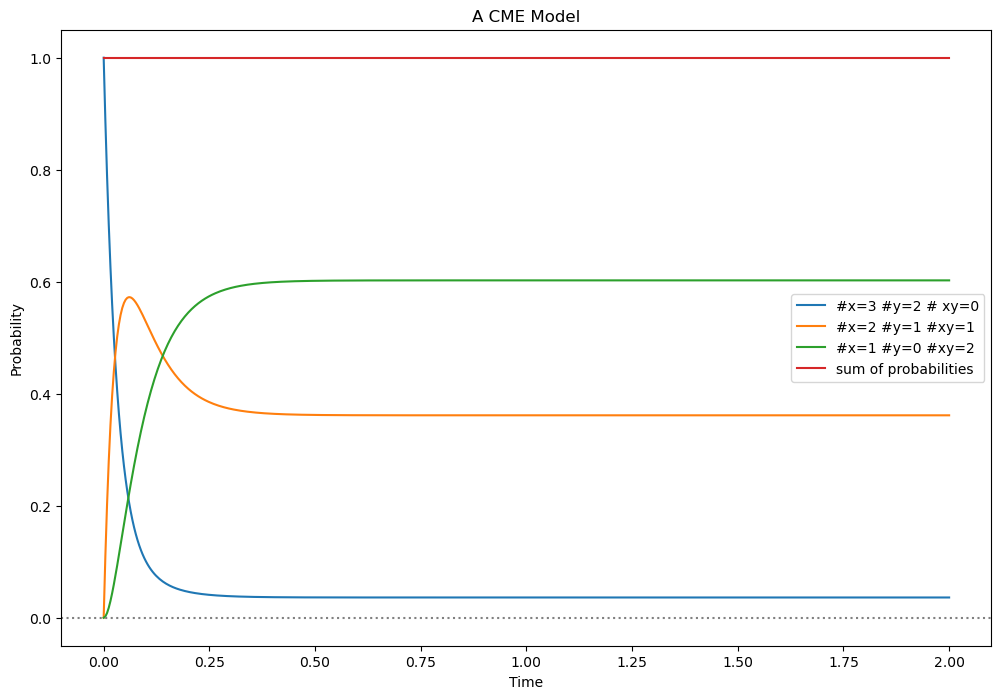

In [13]:
plt.figure(figsize=(12,8))
plt.plot(ts, p0, label = "#x=3 #y=2 # xy=0")
plt.plot(ts, p1, label = "#x=2 #y=1 #xy=1")
plt.plot(ts, p2, label = "#x=1 #y=0 #xy=2")
plt.plot(ts, sum_probs, label = "sum of probabilities")
plt.axhline(0, linestyle='dotted', color='grey')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('A CME Model')
plt.legend()
plt.show()